In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [81]:
def import_ascii(fp):
    x = np.genfromtxt(fp, dtype=None)
    df = pd.DataFrame(x,columns=['nodenumber','x','y','z','water','sand'])
    df = df.iloc[1:,:]
    df = df.astype(float)
    print(df.head())
    return df
df = import_ascii(r"D:\PAKHUIYING\split_barge_door60x1\ASCII_data\bottom-4320")

c:\Users\xinmatrix\anaconda3\envs\fluent\lib\site-packages\ipykernel_launcher.py:2: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  


   nodenumber          x    y     z     water      sand
1         1.0 -50.000000  0.0 -50.0  0.996174  0.003826
2         2.0 -49.750502  0.0 -50.0  0.996016  0.003984
3         3.0 -49.251434  0.0 -50.0  0.995722  0.004278
4         4.0 -48.752197  0.0 -50.0  0.995581  0.004419
5         5.0 -48.252741  0.0 -50.0  0.995395  0.004605


In [82]:
df.describe()
# for a surface, either x,y,z have to stay constant

,nodenumber,x,y,z,water,sand
count,92308.000000,92308.000000,92308.0,92308.000000,92308.000000,92308.000000
mean,46154.500000,0.003620,0.0,-0.030376,0.989469,0.010531
std,26647.168661,29.005954,0.0,29.000248,0.001640,0.001640
min,1.000000,-50.000000,0.0,-50.000000,0.983826,0.003826
25%,23077.750000,-25.122195,0.0,-25.158378,0.988454,0.009609
50%,46154.500000,-0.017256,0.0,-0.017239,0.989319,0.010681
75%,69231.250000,25.149708,0.0,25.116377,0.990391,0.011546
max,92308.000000,50.000000,0.0,50.000000,0.996174,0.016174


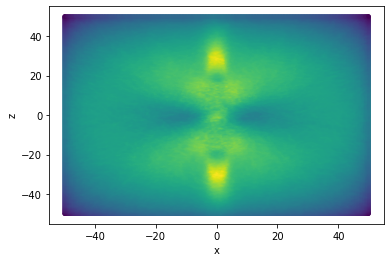

In [83]:
def twod_surface(df,exclude_plane="z"):
    # convert x,y coordinates to points on a mesh
    df = df.drop(["nodenumber",exclude_plane],axis=1,inplace=False)
    # df['sand'] = df['sand']*255
    # print(df['sand'].dtype)
    s1 = df.iloc[:,0].values
    s2 = df.iloc[:,1].values
    c = df['sand'].values
    plt.figure()
    # plt.plot(x[::10],y[::10],'o')
    plt.scatter(s1,s2,c=c,marker='.')
    n1,n2 = df.iloc[:,:2].columns
    plt.xlabel(n1)
    plt.ylabel(n2)
    plt.show()
    return s1,s2,c

s1,s2,c = twod_surface(df,exclude_plane="y")

# Create surfaces

In [84]:
from numpy import linspace, meshgrid
from scipy.interpolate import griddata

def grid(x, y, z, resX=100, resY=100):
    "Convert 3 column data to matplotlib grid"
    # define the grid
    xi = linspace(min(x), max(x), resX)
    yi = linspace(min(y), max(y), resY)
    # interpolate
    zi = griddata((x, y), z, (xi[None,:], yi[:,None]),method='linear')
    return xi,yi,zi

In [85]:
xi,yi,zi = grid(s1,s2,c,resX=10000,resY=10000)

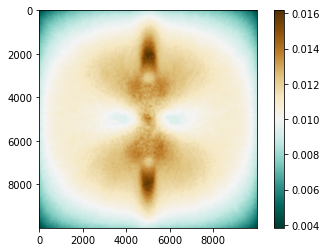

In [95]:
plt.figure()
plt.imshow(zi,cmap='BrBG_r')
plt.colorbar()

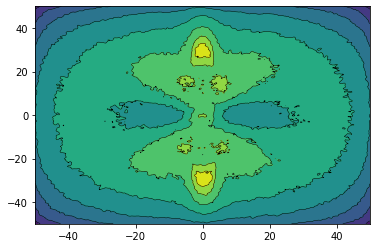

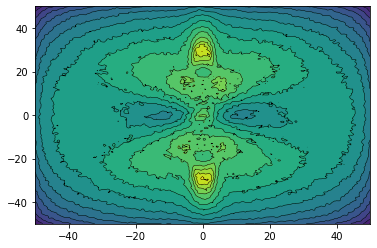

In [90]:
import matplotlib.tri as tri
plt.figure()
plt.tricontour(s1,s2,c, 10, linewidths=0.5, colors='k')
plt.tricontourf(s1,s2,c, 10)

plt.figure()
plt.tricontour(s1,s2,c, 15, linewidths=0.5, colors='k')
plt.tricontourf(s1,s2,c, 15)

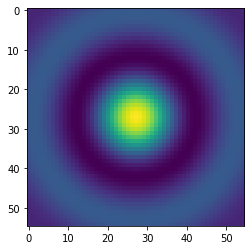

In [3]:
from matplotlib import cm
xvec = np.linspace( -8.0, 8.0, 55 )
yvec = np.linspace( -8.0, 8.0, 55 )
xmat, ymat = np.meshgrid ( xvec, yvec )
rmat = np.sqrt ( xmat**2 + ymat**2 + np.finfo(float).eps )
zmat = np.sin ( rmat ) / rmat
plt.figure()
plt.imshow(zmat)
plt.show()

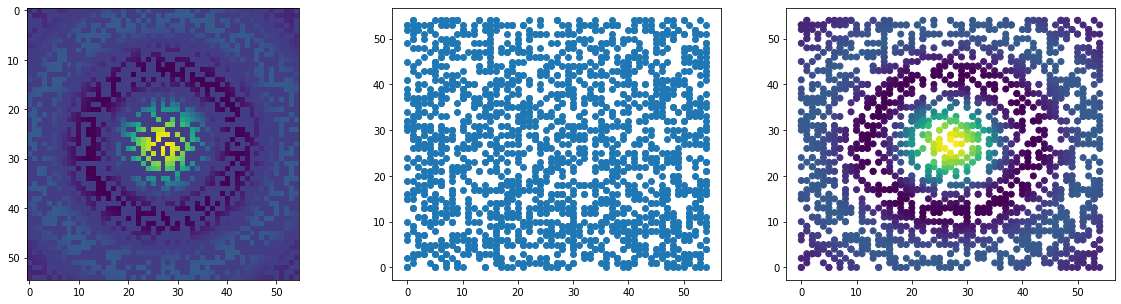

In [16]:
def indices_coordinates(zmat,num,nrow,ncol):
    random_indices = np.random.randint(0,zmat.flatten().shape[0],num)
    unraveled_coord = np.unravel_index(random_indices,(nrow,ncol))
    empty_mat = np.zeros((nrow,ncol))
    x = unraveled_coord[0]
    y = unraveled_coord[1]
    empty_mat[x,y] = zmat[x,y]
    z = zmat[x,y]

    fig,ax = plt.subplots(1,3,figsize=(20,5))
    ax[0].imshow(empty_mat)
    ax[1].plot(x,y,'o')
    ax[2].scatter(x,y,c=z)
    plt.show()

    return x,y,z

x,y,z = indices_coordinates(zmat,num=2000,nrow=55,ncol=55)

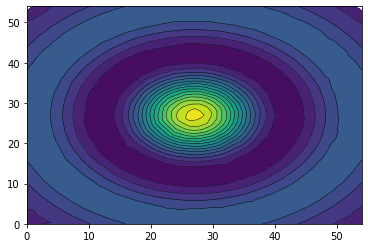

In [18]:
import matplotlib.tri as tri

plt.tricontour(x, y, z, 15, linewidths=0.5, colors='k')
plt.tricontourf(x, y, z, 15)
# tricontour() and tricontourf() draw contour lines and filled contours, respectively.

diff resolution of grid size will affect the smoothness of the interpolated grid

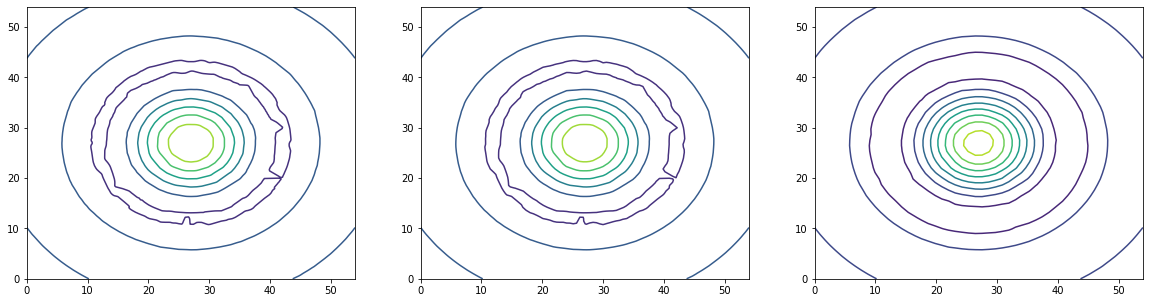

In [27]:
fig,ax = plt.subplots(1,3,figsize=(20,5))
xi,yi,zi = grid(x,y,z, resX=200, resY=200)
ax[0].contour(xi, yi, zi)
xi,yi,zi = grid(x,y,z, resX=100, resY=100)
ax[1].contour(xi, yi, zi)
xi,yi,zi = grid(x,y,z, resX=50, resY=50)
ax[2].contour(xi, yi, zi)
plt.show()

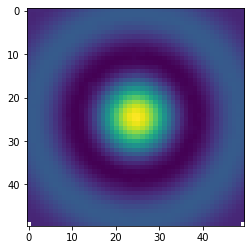

In [31]:
plt.figure()
plt.imshow(zi)

In [ ]:
# https://stackoverflow.com/questions/18764814/make-contour-of-scatter

Test utils

In [7]:
import importlib
import utils
importlib.reload(utils)
from utils import *

In [22]:
fp_list = [r"D:\PAKHUIYING\split_barge_door60x1\ASCII_data\bottom-4320",r"D:\PAKHUIYING\split_barge_door60x1\ASCII_data\bottom-14310"]
min_z = 1 # since it's vol frac
max_z = 0
grid_tensor = np.zeros((1000,1000,len(fp_list)))
for i,fp in enumerate(fp_list):
    df = import_ascii(fp)
    s1,s2,c = plot_points(df,exclude_plane="y",show_plot=False)
    xi,yi,zi = grid(s1,s2,c, res1=1000, res2=1000)
    grid_tensor[:,:,i] = zi
    if zi.max() > max_z:
        max_z = zi.max()
    if zi.min() < min_z:
        min_z = zi.min()

d:\PAKHUIYING\Fluent_python\utils.py:12: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  x = np.genfromtxt(fp, dtype=None)


In [23]:
normalisation = lambda x,min,max: (x - min)/(max-min)
vectorised_norm = np.vectorize(normalisation)
norm_grid = vectorised_norm(grid_tensor,min_z,max_z)

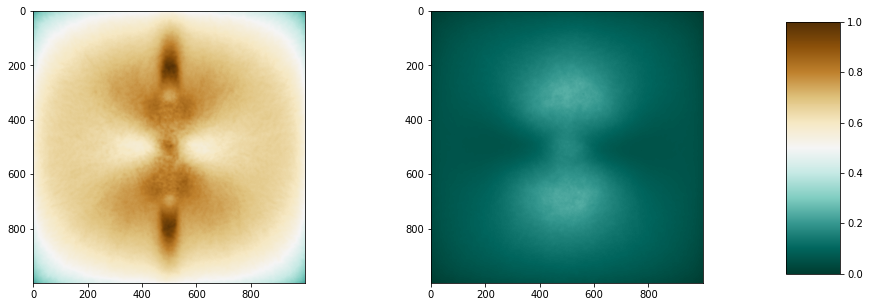

In [26]:
fig,axes = plt.subplots(1,norm_grid.shape[2],figsize=(15,5))
for ax,i in zip(axes.flatten(),range(norm_grid.shape[2])):
    im = ax.imshow(norm_grid[:,:,i],vmin=0,vmax=1,cmap="BrBG_r")

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.show()

In [28]:
norm_grid.tofile('testarray')

In [29]:
testarray = np.fromfile("testarray",dtype= float)

In [32]:
testarray = testarray.reshape((1000,1000,2))

In [34]:
testarray.shape

(1000, 1000, 2)

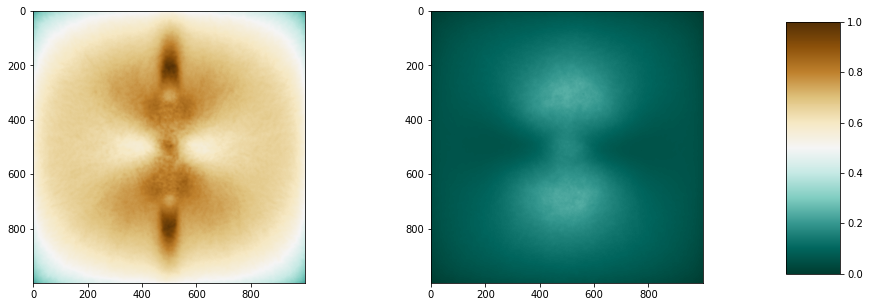

In [35]:
fig,axes = plt.subplots(1,testarray.shape[2],figsize=(15,5))
for ax,i in zip(axes.flatten(),range(testarray.shape[2])):
    im = ax.imshow(testarray[:,:,i],vmin=0,vmax=1,cmap="BrBG_r")

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.show()